## Hidden Markov Model on retrieval data

In [1]:
import numpy as np
import pandas as pd
from hmmlearn import hmm
from acf import *

In [2]:
# Convert Excel data to pandas DataFrame
no_stim = pd.read_excel('first_study_12_animals.xlsx', sheet_name='no stim')
two_sec = pd.read_excel('first_study_12_animals.xlsx', sheet_name='2 sec')
five_sec = pd.read_excel('first_study_12_animals.xlsx', sheet_name='5 sec')
ten_sec = pd.read_excel('first_study_12_animals.xlsx', sheet_name='10 sec')
fifteen_sec = pd.read_excel('first_study_12_animals.xlsx', sheet_name='15 sec')
twenty_sec = pd.read_excel('first_study_12_animals.xlsx', sheet_name='20 sec')
thirty_sec = pd.read_excel('first_study_12_animals.xlsx', sheet_name='30 sec')
forty_sec = pd.read_excel('first_study_12_animals.xlsx', sheet_name='40 sec')

In [3]:
# Convert DataFrames to numpy arrays and hstack to create multivariate time series
no_stim = no_stim.to_numpy()
two_sec = two_sec.to_numpy()
five_sec = five_sec.to_numpy()
ten_sec = ten_sec.to_numpy()
fifteen_sec = fifteen_sec.to_numpy()
twenty_sec = twenty_sec.to_numpy()
thirty_sec = thirty_sec.to_numpy()
forty_sec = forty_sec.to_numpy()

data = np.hstack((no_stim, two_sec, five_sec, ten_sec, fifteen_sec, twenty_sec, thirty_sec, forty_sec))

# Convert data to binary values, where 300 is a 0 and the rest is a 1
binary_data = np.where(data == 300, 0, 1)

### Autocorrection Function (ACF) for time to retrieval (continuous variable)

/opt/miniconda3/envs/stats/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/stats/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


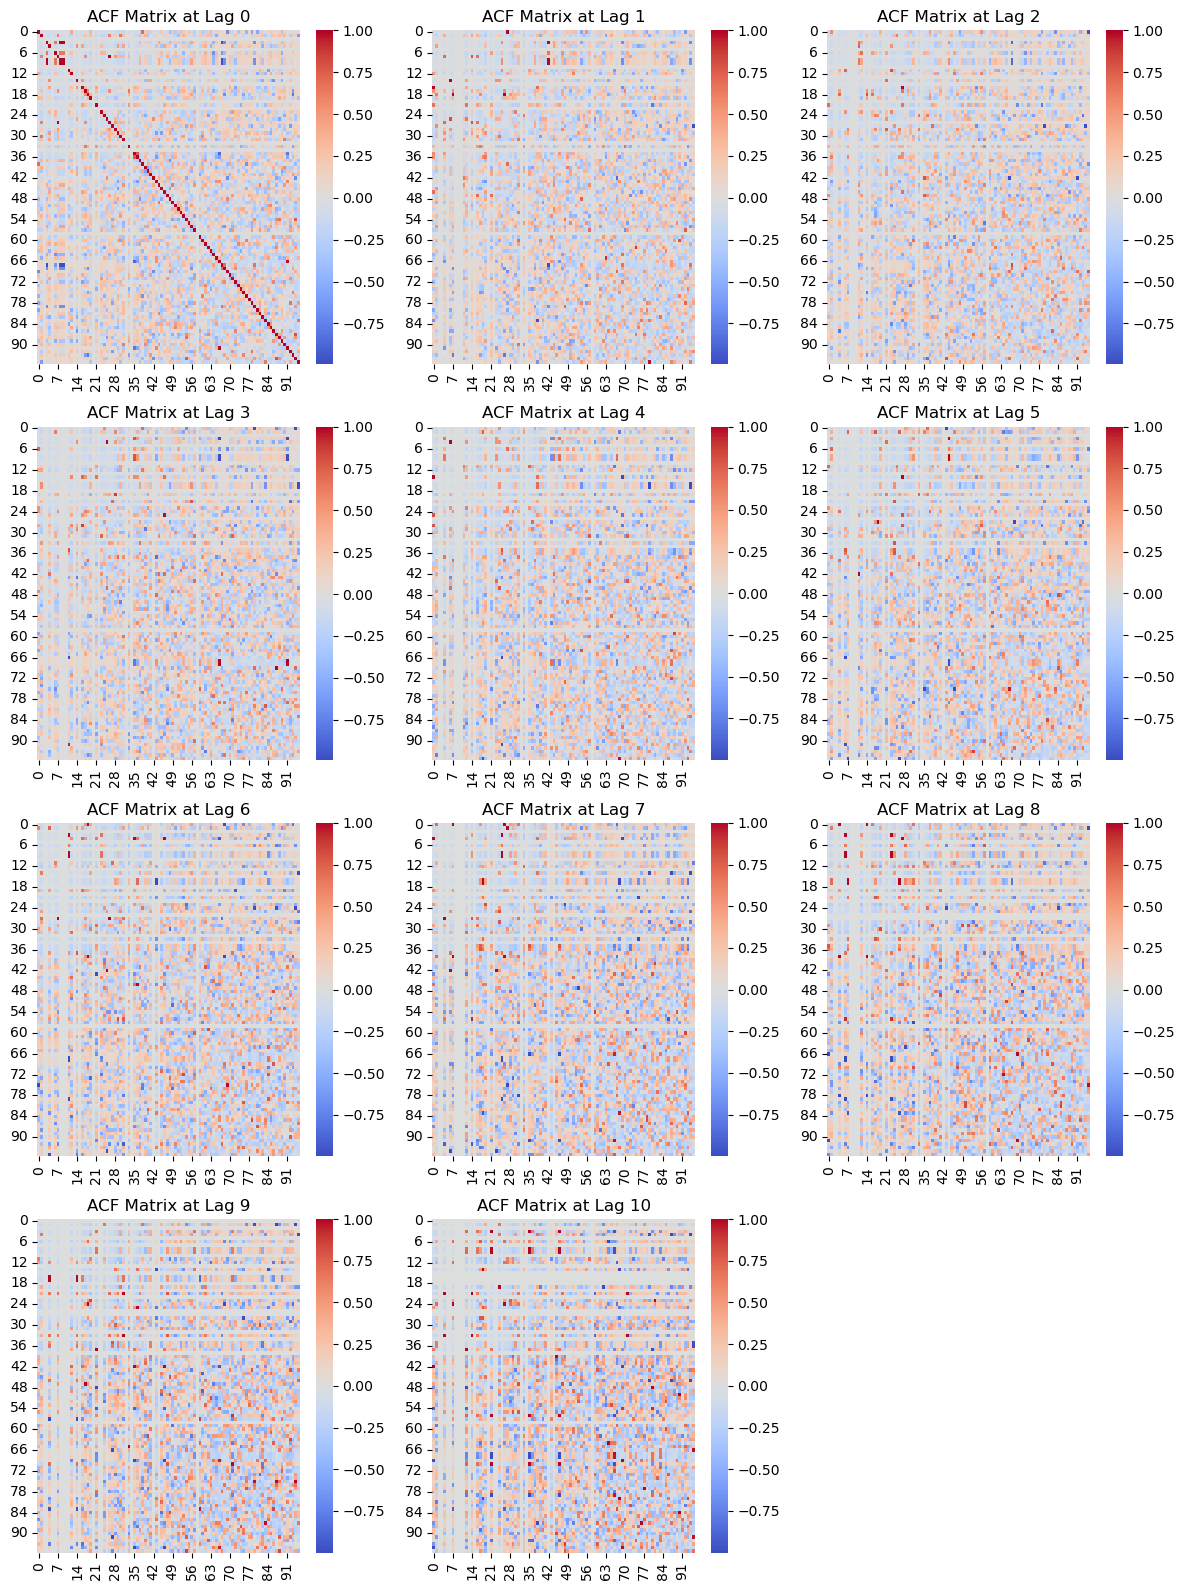

In [4]:
# Calculate and plot the ACF matrices for the multivariate time series
acf_matrices = multivariate_acf(data, nlags=10)
plot_acf_heatmaps(acf_matrices)

In [5]:
# Significance threshold calculation
n = data.shape[0]  # Number of observations
threshold = 1.96 / np.sqrt(n)
print(f"Significance threshold: ±{threshold:.4f}")

# Check if ACF values are within the threshold
for lag, acf_matrix in acf_matrices.items():
    significant = np.any(np.abs(acf_matrix) > threshold)
    if significant:
        print(f"Significant autocorrelations found at lag {lag}")
    else:
        print(f"No significant autocorrelations at lag {lag}")

Significance threshold: ±0.4383
Significant autocorrelations found at lag 0
Significant autocorrelations found at lag 1
Significant autocorrelations found at lag 2
Significant autocorrelations found at lag 3
Significant autocorrelations found at lag 4
Significant autocorrelations found at lag 5
Significant autocorrelations found at lag 6
Significant autocorrelations found at lag 7
Significant autocorrelations found at lag 8
Significant autocorrelations found at lag 9
Significant autocorrelations found at lag 10


### Autocorrection Function (ACF) for binary retrieval (Bernoulli variable)

/opt/miniconda3/envs/stats/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/stats/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


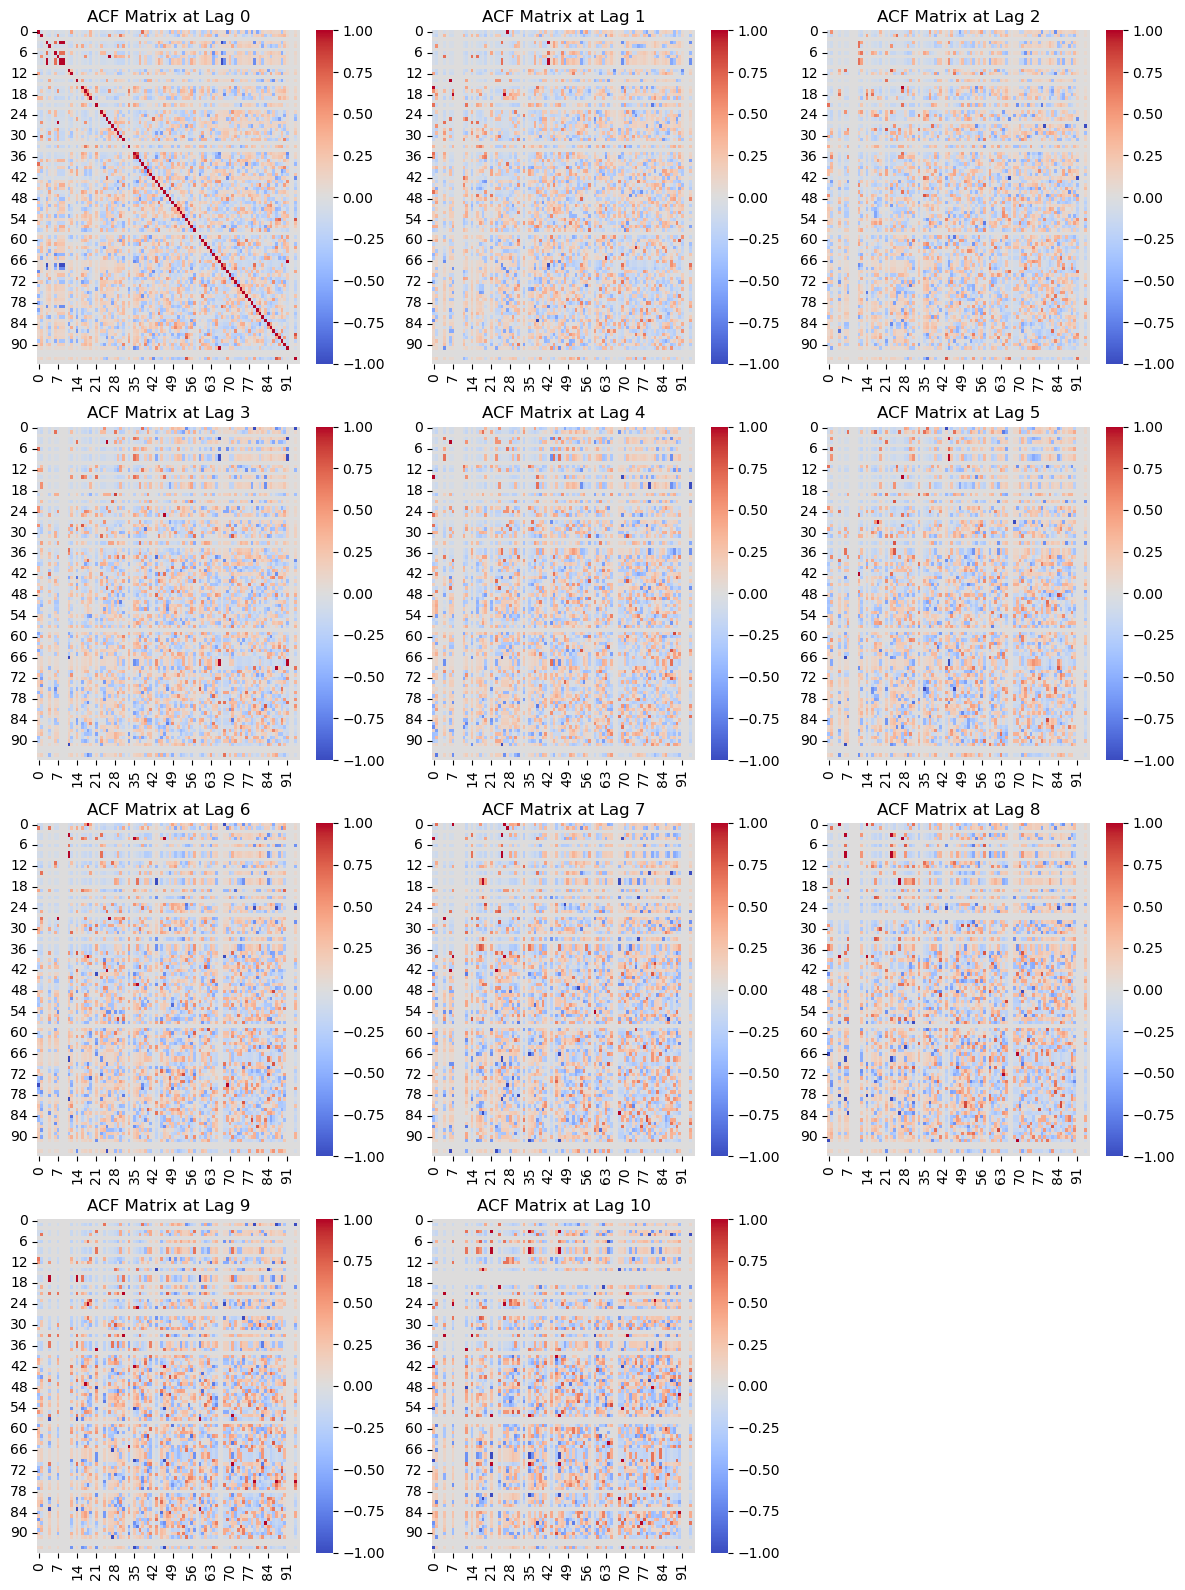

In [6]:
# Calculate and plot the ACF matrices for binary data
bin_acf_mats = multivariate_acf(binary_data, nlags=10)
plot_acf_heatmaps(bin_acf_mats)

In [7]:
# Significance threshold calculation
n = binary_data.shape[0]  # Number of observations
threshold = 1.96 / np.sqrt(n)
print(f"Significance threshold: ±{threshold:.4f}")

# Check if ACF values are within the threshold
for lag, bin_acf_mat in bin_acf_mats.items():
    significant = np.any(np.abs(bin_acf_mat) > threshold)
    if significant:
        print(f"Significant autocorrelations found at lag {lag}")
    else:
        print(f"No significant autocorrelations at lag {lag}")

Significance threshold: ±0.4383
Significant autocorrelations found at lag 0
Significant autocorrelations found at lag 1
Significant autocorrelations found at lag 2
Significant autocorrelations found at lag 3
Significant autocorrelations found at lag 4
Significant autocorrelations found at lag 5
Significant autocorrelations found at lag 6
Significant autocorrelations found at lag 7
Significant autocorrelations found at lag 8
Significant autocorrelations found at lag 9
Significant autocorrelations found at lag 10


### HMM (continuous)

In [8]:
# Build the HMM model and fit to retrieval data
gaussian_hmm = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=50, random_state=0)
gaussian_hmm.fit(data)
gaussian_hmm.score(data)

-6982.485116299355

In [9]:
# Predict the hidden states corresponding to observed data.
Z = gaussian_hmm.predict(data)
states = pd.unique(Z)
print(f"States: {states}")

States: [1 2 0]


In [10]:
print(f'Start probabilities: {gaussian_hmm.startprob_}')
print(f'Transition matrix: {gaussian_hmm.transmat_}')
# print(f'Means: {gaussian_hmm.means_}')
# print(f'Covariances: {gaussian_hmm.covars_}')

Start probabilities: [0. 1. 0.]
Transition matrix: [[0.57142857 0.14285714 0.28571429]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.         0.66666667]]


### HMM (Bernoulli)

In [11]:
# Build the HMM model and fit to binary retrieval data
cat_hmm = hmm.CategoricalHMM(n_components=3, n_features=2, n_iter=50, random_state=0)
cat_hmm.fit(binary_data)
cat_hmm.score(binary_data)

-1313.4589384708809

In [12]:
# Predict the hidden states corresponding to observed binary data.
Z = cat_hmm.predict(binary_data)
states = pd.unique(Z)
print(f"States: {states}")

States: [0 1 2]


In [13]:
print(f'Start probabilities: {cat_hmm.startprob_}')
print(f'Transition matrix: {cat_hmm.transmat_}')
# print(f'Means: {cat_hmm.means_}')
# print(f'Covariances: {cat_hmm.covars_}')

Start probabilities: [0.47861938 0.26278971 0.25859091]
Transition matrix: [[1.01423261e-01 6.81200707e-01 2.17376032e-01]
 [7.13913205e-04 1.67531657e-05 9.99269334e-01]
 [9.75139562e-01 2.44610586e-02 3.99379875e-04]]
